# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('wine.csv')
print(f'There are {len(data)} records')
data.sample(10)

There are 178 records


,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,2
152,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425,2
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,1
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,0
164,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615,2
144,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855,2
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515,2
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,2


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

## Explore data

In [2]:
data.isna().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

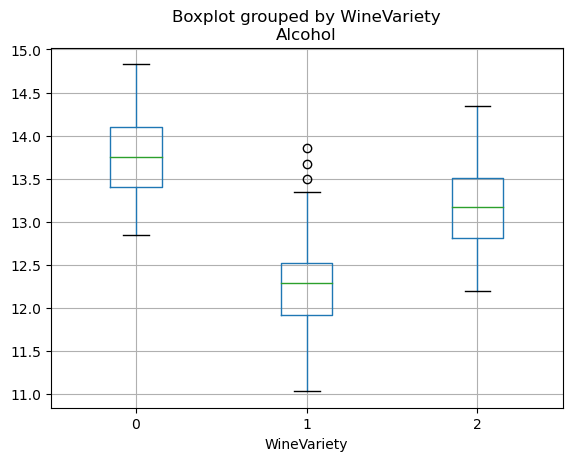

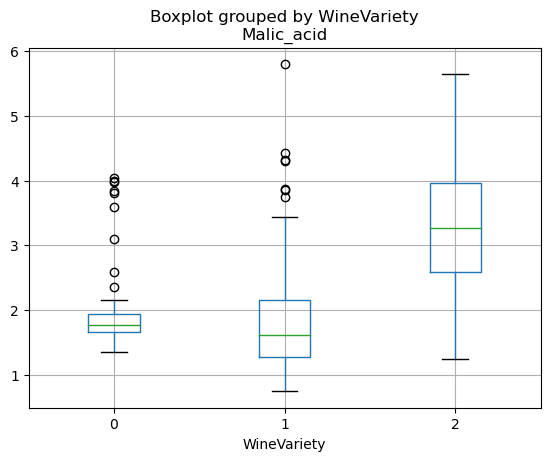

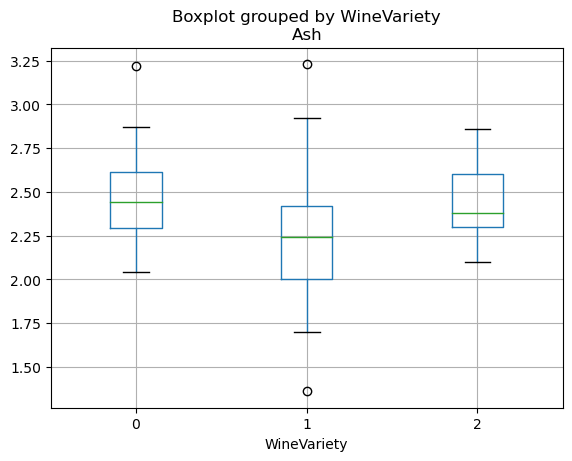

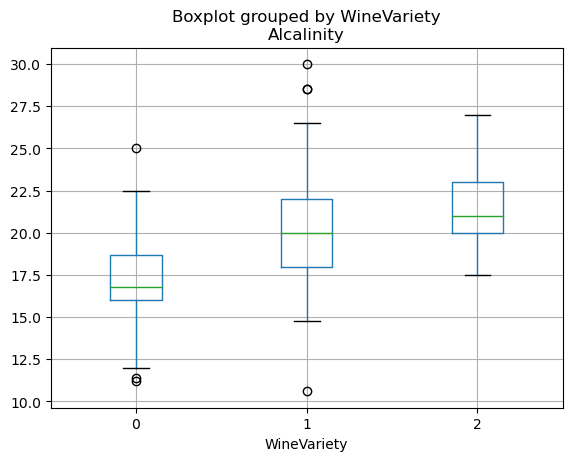

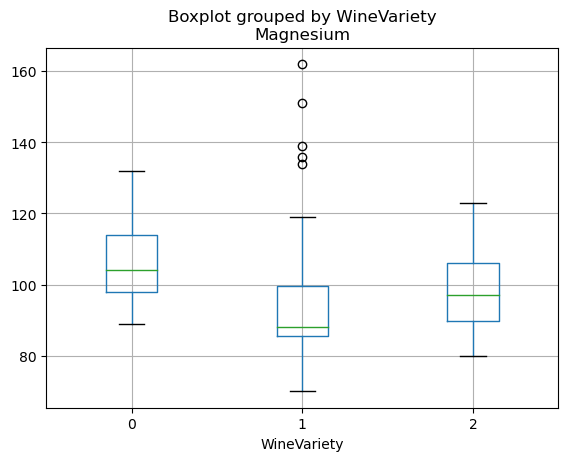

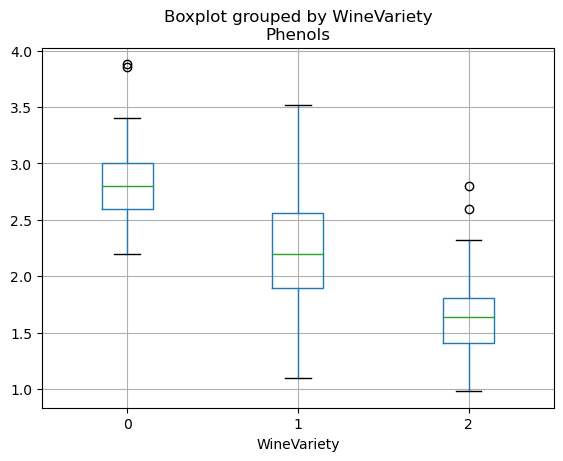

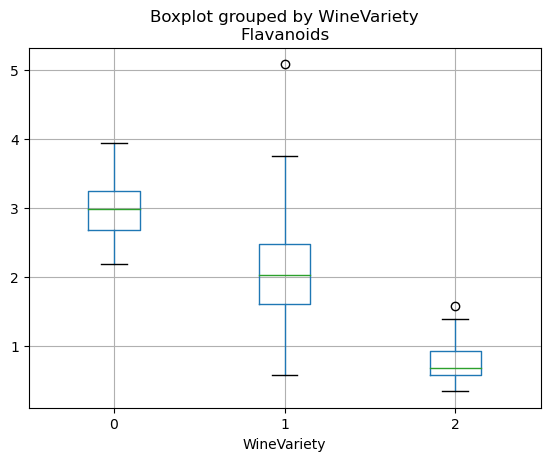

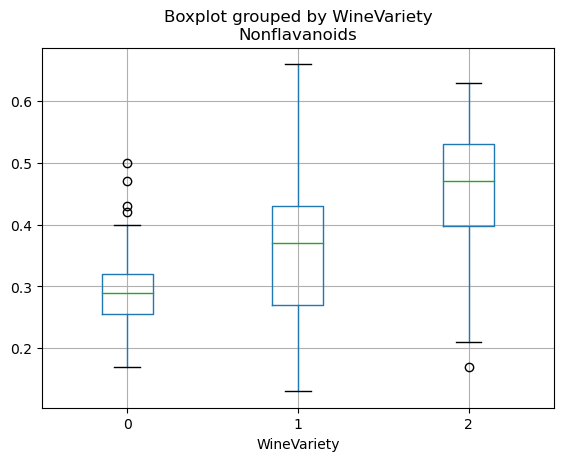

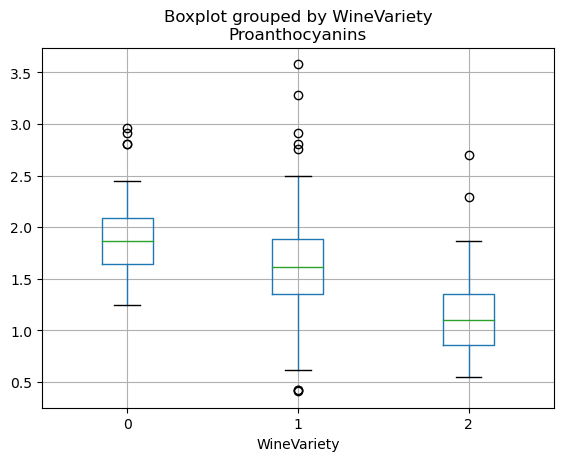

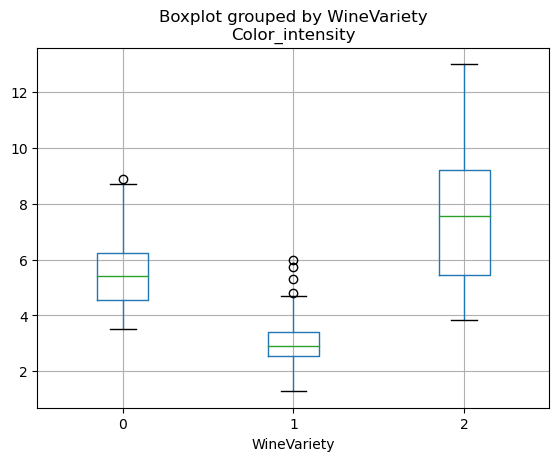

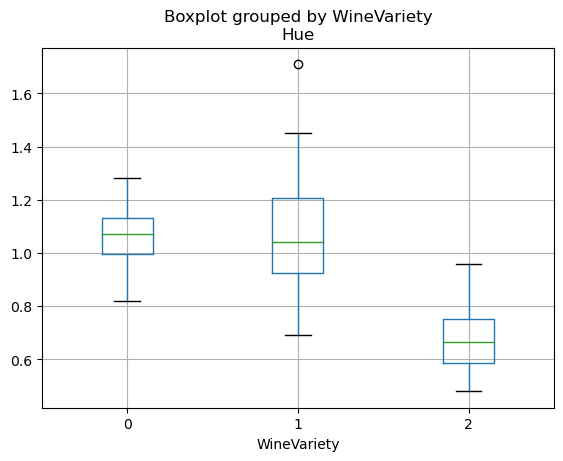

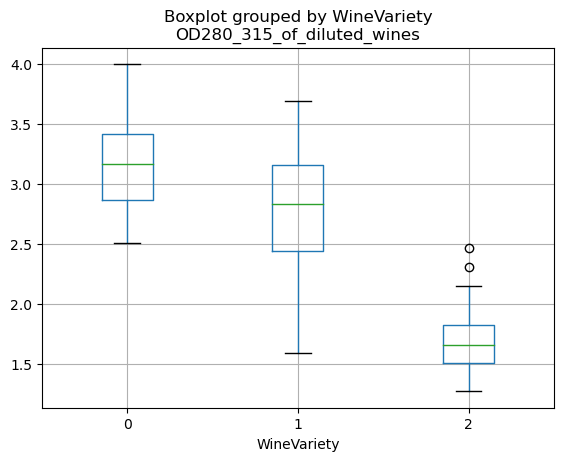

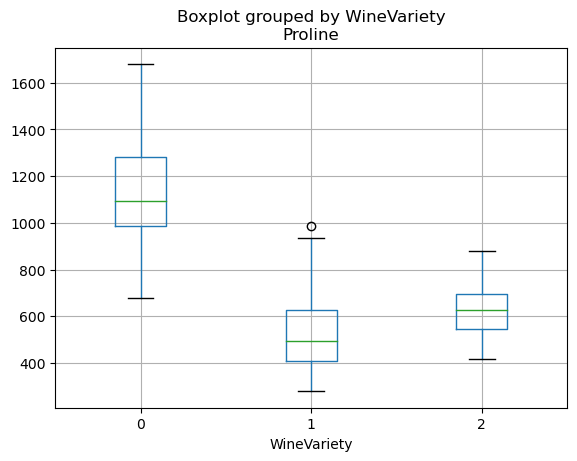

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

features = data.columns[:-1]
label = data.columns[-1]

for feature in features:
    data.boxplot(feature, label)

'Ash' and 'Magnesium' seem similar for all varieties, let's drop them.

In [4]:
col_to_drop = ['Ash', 'Magnesium']
features = features.drop(col_to_drop)

## Data preprocessing

train-test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-1]], data[label], test_size=0.2, random_state=1)

print(f'Train set has {len(X_train)} entries')
print(f'Test set has {len(X_test)} entries')

Train set has 142 entries
Test set has 36 entries


### Pipeline

* dropping potentially irrelevant columns
* standarizing the data

### Logistic Regression

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('column_dropper', 'drop', col_to_drop),
        ('preprocessor', feature_transformer, features )
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(max_iter=10000, multi_class='auto'))
])

model_LR = pipeline.fit(X_train,y_train)
print(model_LR)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('column_dropper', 'drop',
                                                  ['Ash', 'Magnesium']),
                                                 ('preprocessor',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Alcohol', 'Malic_acid', 'Alcalinity', 'Phenols', 'Flavanoids',
       'Nonflavanoids', 'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280_315_of_diluted_wines', 'Proline'],
      dtype='object'))])),
                ('regressor', LogisticRegression(max_iter=10000))])


#### Asses model

In [7]:
import numpy as np
wine_predictions = model_LR.predict(X_test)
print(f'Predicted labels: {wine_predictions[:15]}')
print(f'Actual labels:    {np.array(y_test[:15])}')

Predicted labels: [2 1 0 1 0 2 1 0 2 1 0 0 1 0 1]
Actual labels:    [2 1 0 1 0 2 1 0 2 1 0 0 1 0 1]


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, wine_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.92      0.92        13
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



In [9]:
from sklearn.metrics import recall_score

print(f'Overall Recall: {recall_score(y_test, wine_predictions, average="macro")}')

Overall Recall: 0.9373219373219372


### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('column_dropper', 'drop', col_to_drop),
        ('preprocessor', feature_transformer, features )
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier())
])

model_RF = pipeline.fit(X_train,y_train)
print(model_RF)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('column_dropper', 'drop',
                                                  ['Ash', 'Magnesium']),
                                                 ('preprocessor',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Alcohol', 'Malic_acid', 'Alcalinity', 'Phenols', 'Flavanoids',
       'Nonflavanoids', 'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280_315_of_diluted_wines', 'Proline'],
      dtype='object'))])),
                ('regressor', RandomForestClassifier())])


#### Assess model

In [11]:
wine_predictions_RF = model_RF.predict(X_test)
print(f'Predicted labels: {wine_predictions[:15]}')
print(f'Actual labels:    {np.array(y_test[:15])}')

Predicted labels: [2 1 0 1 0 2 1 0 2 1 0 0 1 0 1]
Actual labels:    [2 1 0 1 0 2 1 0 2 1 0 0 1 0 1]


In [12]:
print(f'Overall Recall: {recall_score(y_test, wine_predictions_RF, average="macro")}')

Overall Recall: 0.9743589743589745


## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [13]:
import joblib

joblib.dump(model_RF, 'wine_classifier.pkl')

['wine_classifier.pkl']

In [14]:
model = joblib.load('wine_classifier.pkl')
wine_1 = [13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285]
wine_2 = [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]
new_test = pd.DataFrame([wine_1,wine_2], columns = data.columns[:-1] )
model.predict(new_test)

array([0, 1], dtype=int64)